# Import all dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
# from keras.layers.normalization import BatchNormalization

In [ ]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224]

# training config:
epochs = 50
batch_size = 64

#define paths
covid_path = '/content/drive/MyDrive/Ralph_Research/data/COVID'
noncovid_path = '/content/drive/MyDrive/Ralph_Research/data/non-COVID'

# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

In [ ]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))
print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))

First 5 Covid Files:  ['/content/drive/MyDrive/Ralph_Research/data/COVID/Covid (1240).png', '/content/drive/MyDrive/Ralph_Research/data/COVID/Covid (240).png', '/content/drive/MyDrive/Ralph_Research/data/COVID/Covid (27).png', '/content/drive/MyDrive/Ralph_Research/data/COVID/Covid (172).png', '/content/drive/MyDrive/Ralph_Research/data/COVID/Covid (223).png']
Total Count:  1252
First 5 NonCovid Files:  ['/content/drive/MyDrive/Ralph_Research/data/non-COVID/Non-Covid (1139).png', '/content/drive/MyDrive/Ralph_Research/data/non-COVID/Non-Covid (1136).png', '/content/drive/MyDrive/Ralph_Research/data/non-COVID/Non-Covid (1122).png', '/content/drive/MyDrive/Ralph_Research/data/non-COVID/Non-Covid (1130).png', '/content/drive/MyDrive/Ralph_Research/data/non-COVID/Non-Covid (124).png']
Total Count:  1229


# Fetch Images and Class Labels from Files (This might take a while)

In [ ]:
# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') #append class label
for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

# Visualize First 40 Images from Data set

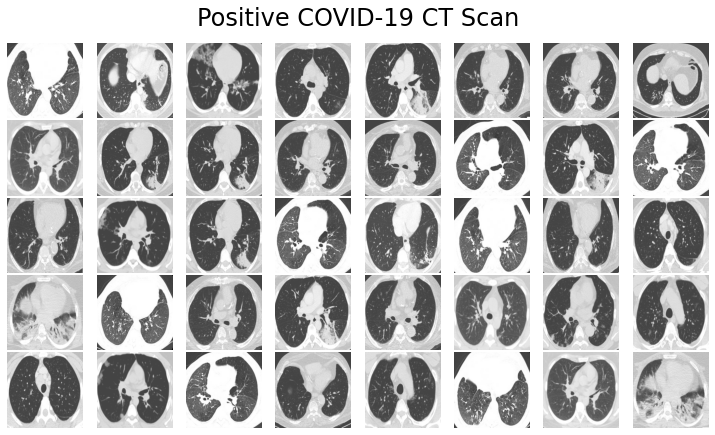

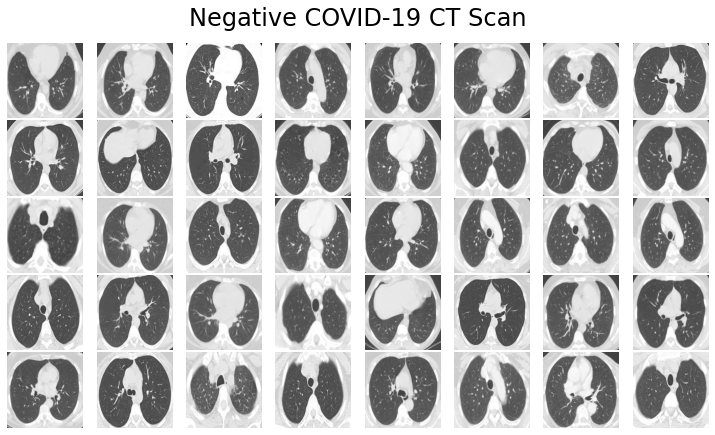

In [ ]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(covid_images, 'Positive COVID-19 CT Scan')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')

# Normalization Model takes images in the form of array of pixels.
## Hence convert into array and normalize

In [ ]:
# Convert to array and Normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

## Train test split

In [ ]:
# Split into training and testing sets for both types of images
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

# Make labels into categories - either 0 or 1, for our model
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

# Building VGG16 and Visualizing model

In [ ]:
# # Building Model
# model = VGG16(weights="imagenet", include_top=False,
#     input_tensor=Input(shape=(224, 224, 3)))

# # outputs = vggModel.output
# # outputs = Flatten(name="flatten")(outputs)
# # outputs = Dropout(0.5)(outputs)
# # outputs = Dense(2, activation="softmax")(outputs)

# # model = Model(inputs=vggModel.input, outputs=outputs)

# # for layer in vggModel.layers:
# #     layer.trainable = False

# model.compile(
#         loss='categorical_crossentropy', 
#         optimizer='adam', 
#         metrics=['accuracy']
# )

# train_aug = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True
# )

vgg = VGG16(input_shape= (224, 224, 3),weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(2,activation='softmax')(x)
model = Model(inputs = vgg.input,outputs=preds)

model.compile(optimizer='Adam',
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Image Augmentation
### To train on images at different positions, angles, flips, etc

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=50)

Epoch 1/50
31/31 [==============================] - 65s 1s/step - loss: 7.7158 - accuracy: 0.5146 - val_loss: 0.6926 - val_accuracy: 0.5030
Epoch 2/50
31/31 [==============================] - 25s 798ms/step - loss: 0.6952 - accuracy: 0.5126 - val_loss: 0.6927 - val_accuracy: 0.5312
Epoch 3/50
31/31 [==============================] - 26s 823ms/step - loss: 0.6941 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 4/50
31/31 [==============================] - 27s 842ms/step - loss: 0.6942 - accuracy: 0.4793 - val_loss: 0.6927 - val_accuracy: 0.5050
Epoch 5/50
31/31 [==============================] - 26s 820ms/step - loss: 0.6937 - accuracy: 0.5121 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 6/50
31/31 [==============================] - 25s 805ms/step - loss: 0.6933 - accuracy: 0.5045 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 7/50
31/31 [==============================] - 26s 811ms/step - loss: 0.6935 - accuracy: 0.5045 - val_loss: 0.6931 - val_accuracy: 0.5050
Ep

In [ ]:
%cd /content/drive/MyDrive/Ralph_Research

/content/drive/MyDrive/Ralph_Research


In [ ]:
# Save Model and Weights
model.save('vgg_ct.h5')
model.save_weights('vgg_weights_ct.hdf5')

In [ ]:
model = load_model('vgg_ct.h5')

y_pred = model.predict(X_test, batch_size=batch_size)

## Visulaizing First 10 predictions

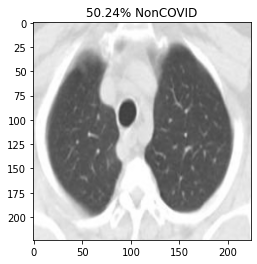

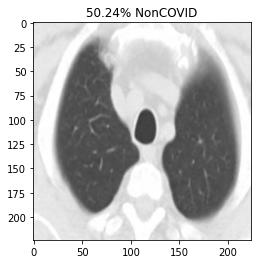

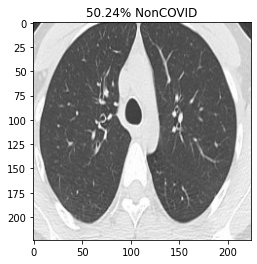

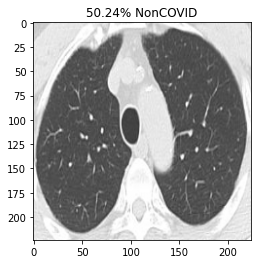

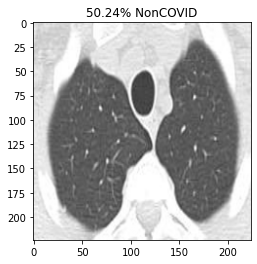

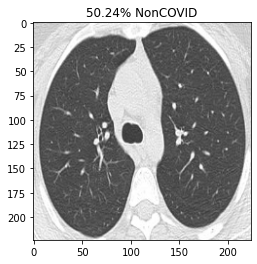

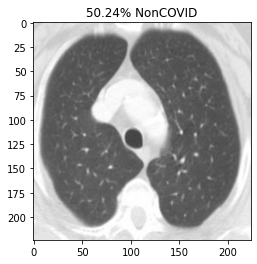

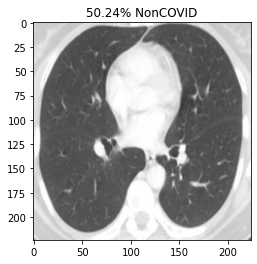

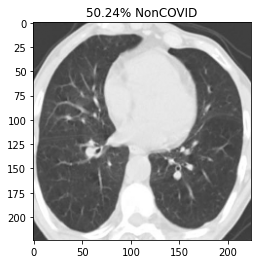

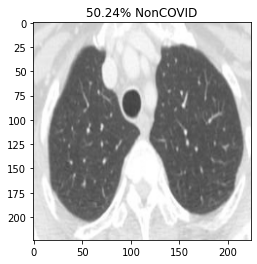

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

## Plot ROC Curve

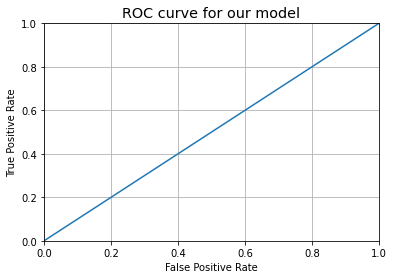

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## Plot Confusion Matrix

Confusion Matrix without Normalization


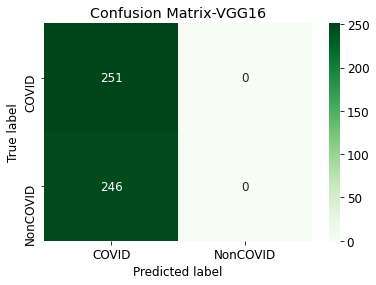

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='Greens',fmt="d",annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix-VGG16')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

# print('Confusion Matrix with Normalized Values')
# plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       251
           1       0.00      0.00      0.00       246

    accuracy                           0.51       497
   macro avg       0.25      0.50      0.34       497
weighted avg       0.26      0.51      0.34       497



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Accuracy and Loss Plots

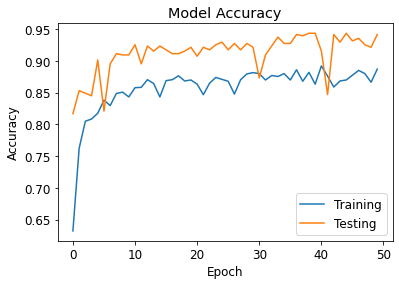

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_ct_accuracy.png')
plt.show()

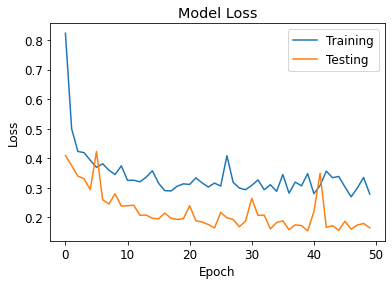

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_ct_loss.png')
plt.show()

# Building GoogleNet(Inception) and Visualizing model

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# google_net_Model = inception_v3(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
google_net_Model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
outputs = google_net_Model.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=google_net_Model.input, outputs=outputs)

for layer in google_net_Model.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

<!-- ## Image Augmentation -->
### To train on images at different positions, angles, flips, etc

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=50)


Epoch 1/50
31/31 [==============================] - 22s 647ms/step - loss: 1.3957 - accuracy: 0.7293 - val_loss: 0.3733 - val_accuracy: 0.8833
Epoch 2/50
31/31 [==============================] - 20s 647ms/step - loss: 1.1648 - accuracy: 0.7727 - val_loss: 0.4193 - val_accuracy: 0.8853
Epoch 3/50
31/31 [==============================] - 20s 643ms/step - loss: 1.4783 - accuracy: 0.7399 - val_loss: 0.6318 - val_accuracy: 0.8551
Epoch 4/50
31/31 [==============================] - 20s 639ms/step - loss: 0.9490 - accuracy: 0.7883 - val_loss: 0.3967 - val_accuracy: 0.8873
Epoch 5/50
31/31 [==============================] - 20s 635ms/step - loss: 1.4368 - accuracy: 0.7525 - val_loss: 0.4499 - val_accuracy: 0.8954
Epoch 6/50
31/31 [==============================] - 20s 638ms/step - loss: 1.3007 - accuracy: 0.7984 - val_loss: 0.4325 - val_accuracy: 0.9034
Epoch 7/50
31/31 [==============================] - 20s 630ms/step - loss: 1.0832 - accuracy: 0.7843 - val_loss: 0.4484 - val_accuracy: 0.9014

In [ ]:
%cd /content/drive/MyDrive/Ralph_Research

/content/drive/MyDrive/Ralph_Research


In [ ]:
# Save Model and Weights
model.save('ggnet_ct.h5')
model.save_weights('ggnet_weights_ct.hdf5')

In [ ]:
model = load_model('ggnet_ct.h5')

y_pred = model.predict(X_test, batch_size=batch_size)

## Visulaizing First 10 predictions

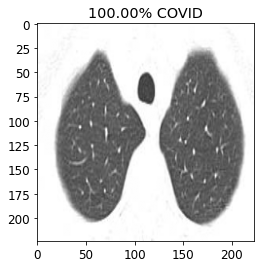

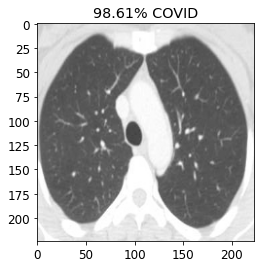

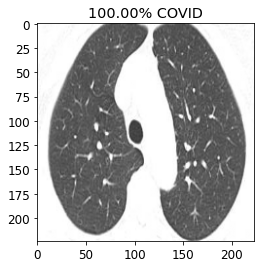

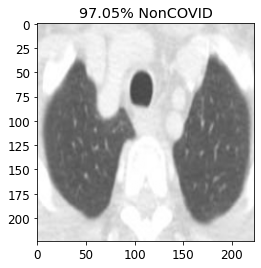

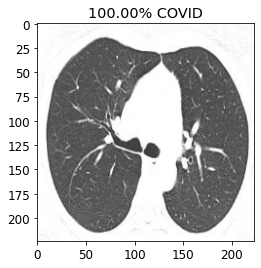

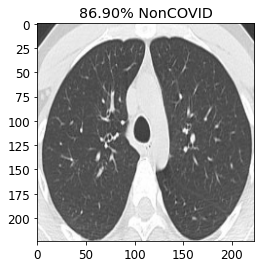

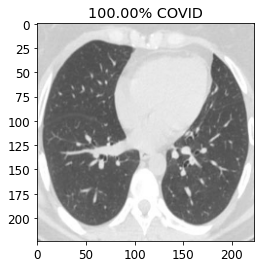

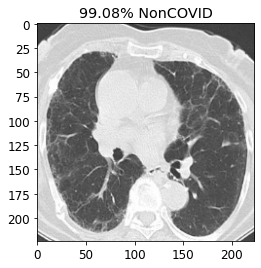

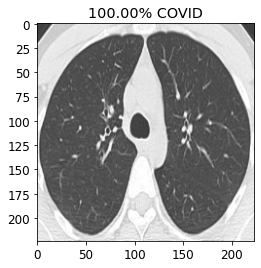

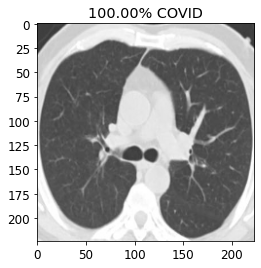

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

## Plot ROC Curve

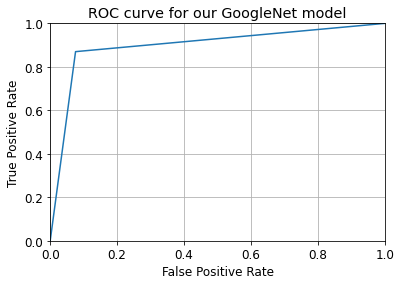

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our GoogleNet model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## Plot Confusion Matrix

Confusion Matrix without Normalization


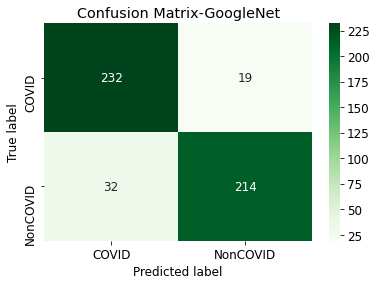

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='Greens',fmt="d",annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix-GoogleNet')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

# print('Confusion Matrix with Normalized Values')
# plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       251
           1       0.92      0.87      0.89       246

    accuracy                           0.90       497
   macro avg       0.90      0.90      0.90       497
weighted avg       0.90      0.90      0.90       497



## Accuracy and Loss Plots

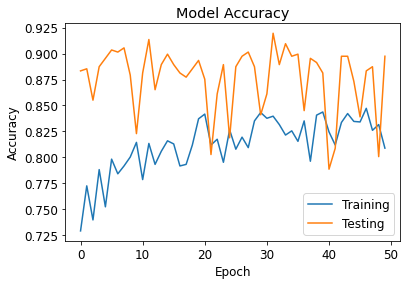

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_ct_accuracy.png')
plt.show()

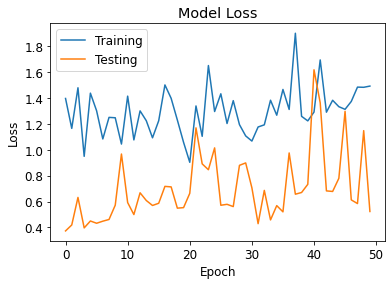

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_ct_loss.png')
plt.show()

# Building Xception and Visualizing model

In [ ]:
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input, decode_predictions
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# google_net_Model = inception_v3(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
Xception_Model = Xception(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
Xception_Model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
outputs = Xception_Model.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=Xception_Model.input, outputs=outputs)

for layer in Xception_Model.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

<!-- ## Image Augmentation -->
### To train on images at different positions, angles, flips, etc

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=50)


Epoch 1/50
31/31 [==============================] - 27s 747ms/step - loss: 2.6718 - accuracy: 0.6593 - val_loss: 1.3793 - val_accuracy: 0.7344
Epoch 2/50
31/31 [==============================] - 22s 693ms/step - loss: 0.9418 - accuracy: 0.7873 - val_loss: 0.5149 - val_accuracy: 0.8270
Epoch 3/50
31/31 [==============================] - 22s 691ms/step - loss: 0.6816 - accuracy: 0.8085 - val_loss: 0.5509 - val_accuracy: 0.7887
Epoch 4/50
31/31 [==============================] - 21s 674ms/step - loss: 0.7472 - accuracy: 0.8039 - val_loss: 0.6738 - val_accuracy: 0.8169
Epoch 5/50
31/31 [==============================] - 21s 669ms/step - loss: 0.6488 - accuracy: 0.8271 - val_loss: 0.5181 - val_accuracy: 0.8189
Epoch 6/50
31/31 [==============================] - 21s 681ms/step - loss: 0.6715 - accuracy: 0.8206 - val_loss: 0.5168 - val_accuracy: 0.8209
Epoch 7/50
31/31 [==============================] - 21s 679ms/step - loss: 0.5831 - accuracy: 0.8377 - val_loss: 0.4170 - val_accuracy: 0.8692

In [ ]:
%cd /content/drive/MyDrive/Ralph_Research

/content/drive/MyDrive/Ralph_Research


In [ ]:
# Save Model and Weights
model.save('xception_ct.h5')
model.save_weights('xception_weights_ct.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model = load_model('xception_ct.h5')

y_pred = model.predict(X_test, batch_size=batch_size)

## Visulaizing First 10 predictions

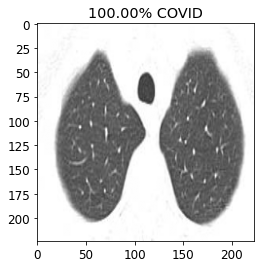

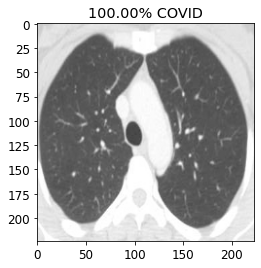

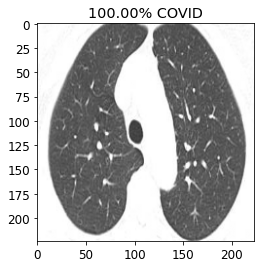

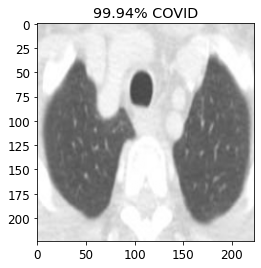

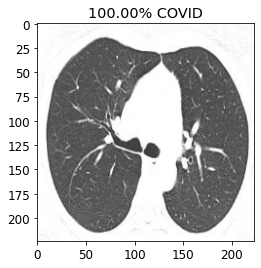

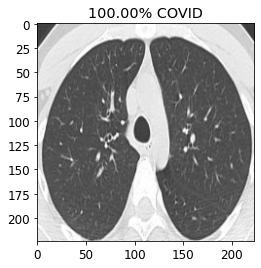

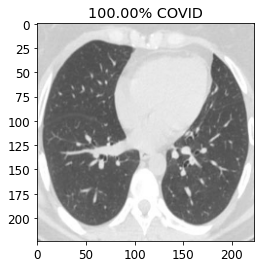

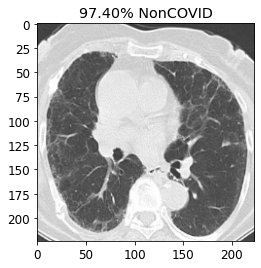

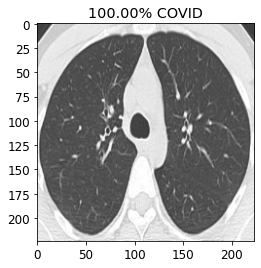

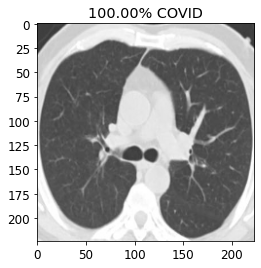

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

## Plot ROC Curve

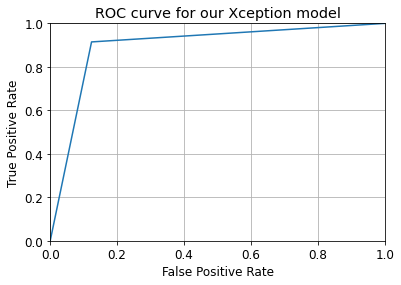

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our Xception model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## Plot Confusion Matrix

Confusion Matrix without Normalization


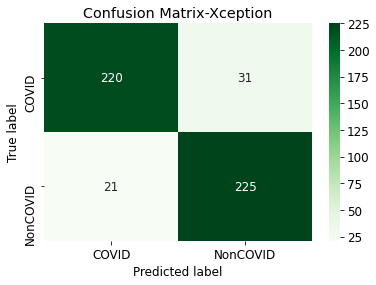

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='Greens',fmt="d",annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix-Xception')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

# print('Confusion Matrix with Normalized Values')
# plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       251
           1       0.88      0.91      0.90       246

    accuracy                           0.90       497
   macro avg       0.90      0.90      0.90       497
weighted avg       0.90      0.90      0.90       497



## Accuracy and Loss Plots

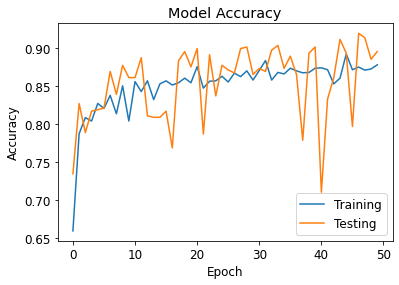

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_ct_accuracy.png')
plt.show()

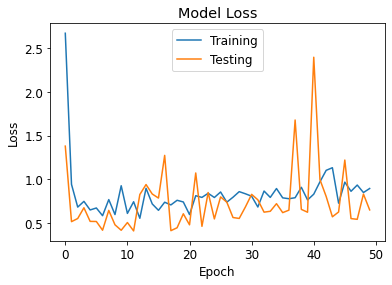

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_ct_loss.png')
plt.show()